In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from urllib.request import urlretrieve
from icedef import metocean, test_case, simulator, timesteppers, plot

# Our Test Case

In [2]:
tc = test_case.TestCase()
start_latitude = tc.start_latitude
start_longitude = tc.start_longitude
start_velocity = tc.start_velocity
start_time = tc.start_time
end_time = tc.end_time
ref_times = tc.ref_times
ref_lons = tc.ref_lons
ref_lats = tc.ref_lats
start_location = (tc.start_latitude, tc.start_longitude)
time_frame = (tc.start_time, tc.end_time)
start_velocity = tc.start_velocity

In [3]:
time_frame

(numpy.datetime64('2015-05-06T15:27:39.000000'),
 numpy.datetime64('2015-05-07T06:25:51.000000'))

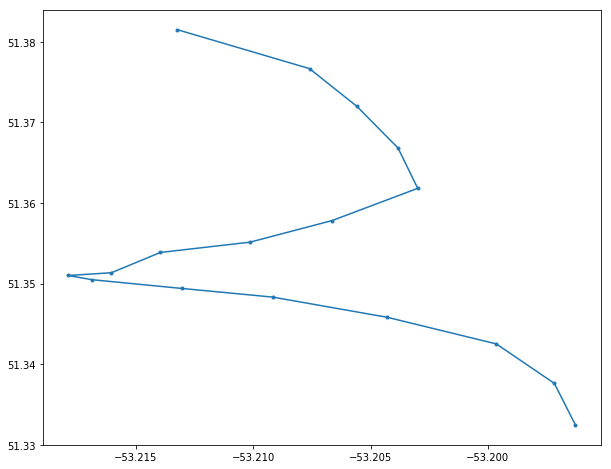

In [4]:
plt.figure(figsize=(10, 8))
plt.plot(ref_lons.values, ref_lats.values, '.-')
plt.show()

# AVOS

In [5]:
data = pd.read_csv('http://icedef.munroelab.ca/data/StatoilArcticNet/AVOS_2015.csv', sep=' ; ')
bad_rows = np.where((data['Longitude'] > 180) | (data['Longitude'] < -180) |
                    (data['Latitude'] > 180) | (data['Latitude'] < -180))[0]

data = data.drop(data.index[bad_rows])
data['Date'] = data['Date'].str.replace('/', '-')
data['Date'] = pd.to_datetime(data['Date'])
data['Wind speed'] = pd.to_numeric(data['Wind speed'])
data['Wind dir'] = pd.to_numeric(data['Wind dir'])

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [6]:
data.head()

,Date,Latitude,Longitude,Wind dir,Wind speed,Air temp,Water temp,dew point,pressure
0,2015-04-16 00:00:00,46.8,-71.2,10,2,6.7,NaN,-4.7,1026.7
1,2015-04-16 06:00:00,46.8,-71.2,20,4,3.2,NaN,-8.1,1030.2
2,2015-04-16 12:00:00,46.8,-71.2,190,5,2.1,NaN,-6.8,1032.6
3,2015-04-16 18:00:00,46.8,-71.2,200,10,8.9,NaN,-7.3,1026.4
4,2015-04-17 00:00:00,46.8,-71.2,200,4,8.7,NaN,-2.0,1020.1


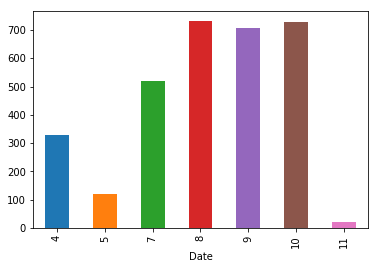

In [11]:
data['Date'].groupby(data["Date"].dt.month).count().plot(kind="bar")

In [12]:
may_data = data.loc[data['Date'].dt.month == 5]

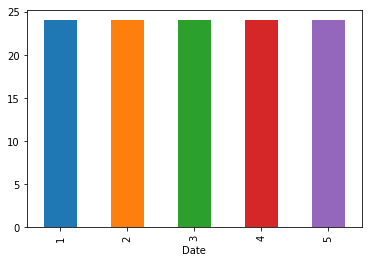

In [13]:
may_data['Date'].groupby(may_data["Date"].dt.day).count().plot(kind="bar")

In [14]:
may_data.head()

,Date,Latitude,Longitude,Wind dir,Wind speed,Air temp,Water temp,dew point,pressure
329,2015-05-01 00:00:00,50.1,-62.2,100,19,2.3,0.4,-1.2,1018.8
330,2015-05-01 01:00:00,50.1,-62.3,110,17,1.7,0.5,-1.1,1018.9
331,2015-05-01 02:00:00,50.0,-62.0,60,14,1.9,0.4,-1.4,1018.8
332,2015-05-01 03:00:00,50.0,-61.9,40,12,1.4,0.4,-1.4,1019.2
333,2015-05-01 04:00:00,50.0,-61.9,20,12,1.0,0.4,-1.5,1019.0


In [17]:
ref_times[:10], ref_lons[:10].values, ref_lats[:10].values

([numpy.datetime64('2015-05-06T15:27:39.000000'),
  numpy.datetime64('2015-05-06T16:27:22.000000'),
  numpy.datetime64('2015-05-06T17:27:21.000000'),
  numpy.datetime64('2015-05-06T18:27:05.000000'),
  numpy.datetime64('2015-05-06T19:26:50.000000'),
  numpy.datetime64('2015-05-06T20:26:57.000000'),
  numpy.datetime64('2015-05-06T21:26:41.000000'),
  numpy.datetime64('2015-05-06T22:26:24.000000'),
  numpy.datetime64('2015-05-06T23:26:07.000000'),
  numpy.datetime64('2015-05-07T00:26:23.000000')],
 array([-53.21323, -53.2076 , -53.20559, -53.20383, -53.20299, -53.20664,
        -53.21014, -53.21395, -53.21604, -53.21788]),
 array([51.38151, 51.37668, 51.37202, 51.36684, 51.36183, 51.35783,
        51.35515, 51.35388, 51.35136, 51.35102]))

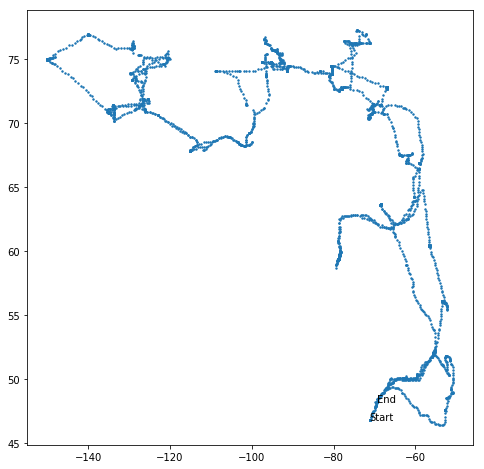

In [18]:
plt.figure(figsize=(8, 8))
plt.scatter(data['Longitude'], data['Latitude'], s=2)
plt.annotate('Start', (data['Longitude'][0], data['Latitude'][0]))
plt.annotate('End', (data['Longitude'][len(data) - 1], data['Latitude'][len(data) - 1]))
plt.show()

In [19]:
start_row = np.where(data['Date'] < start_time)[0][-1] + 1
end_row = np.where(data['Date'] > end_time)[0][0] - 1

df = data[start_row : end_row + 1]

df

,Date,Latitude,Longitude,Wind dir,Wind speed,Air temp,Water temp,dew point,pressure


In [20]:
print(f'Time frame: {time_frame}')
data[start_row - 2 : end_row + 10]

Time frame: (numpy.datetime64('2015-05-06T15:27:39.000000'), numpy.datetime64('2015-05-07T06:25:51.000000'))


,Date,Latitude,Longitude,Wind dir,Wind speed,Air temp,Water temp,dew point,pressure
447,2015-05-05 22:00:00,46.8,-71.2,20,5,18.2,NaN,-1.5,1019.8
448,2015-05-05 23:00:00,46.8,-71.2,20,11,14.9,NaN,2.3,1020.8
449,2015-07-10 00:00:00,46.8,-71.2,20,2,23.2,NaN,14.3,1011.1
450,2015-07-10 01:00:00,46.8,-71.2,10,5,22.5,NaN,16.0,1011.0
451,2015-07-10 02:00:00,46.8,-71.2,250,1,22.4,NaN,15.0,1010.7
452,2015-07-10 03:00:00,46.8,-71.2,20,4,21.1,NaN,16.2,1010.8
453,2015-07-10 04:00:00,46.8,-71.2,30,4,20.5,NaN,14.3,1010.6
454,2015-07-10 05:00:00,46.8,-71.2,0,0,20.2,NaN,15.0,1010.4
455,2015-07-10 06:00:00,46.8,-71.2,280,2,20.2,NaN,14.2,1010.2
456,2015-07-10 07:00:00,46.8,-71.2,220,1,19.2,NaN,14.0,1010.3


In [21]:
np.where((data['Longitude'] > -60) & (data['Longitude'] < -40) & (data['Latitude'] > 40) & (data['Latitude'] < 60))

(array([  50,   51,   52,   53,   54,   55,   56,   57,   58,   59,   60,
          61,   62,   63,   64,   65,   66,   67,   68,   69,   70,   71,
          72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,
          83,   84,   85,   86,   87,   88,   89,   90,   91,   92,   93,
          94,   95,   96,   97,   98,   99,  100,  101,  102,  103,  104,
         105,  106,  107,  108,  109,  110,  111,  112,  113,  114,  115,
         116,  117,  118,  119,  120,  121,  122,  123,  124,  125,  126,
         127,  128,  129,  130,  131,  132,  133,  134,  135,  136,  137,
         138,  139,  140,  141,  142,  143,  144,  145,  146,  147,  148,
         149,  150,  151,  152,  153,  154,  155,  156,  157,  158,  159,
         160,  161,  162,  163,  164,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  184,  185,  186,  187,  188,  189,  190,  191,  192,
         193,  194,  195,  196,  197, 

In [22]:
df = data[289:314].reset_index(drop=True)

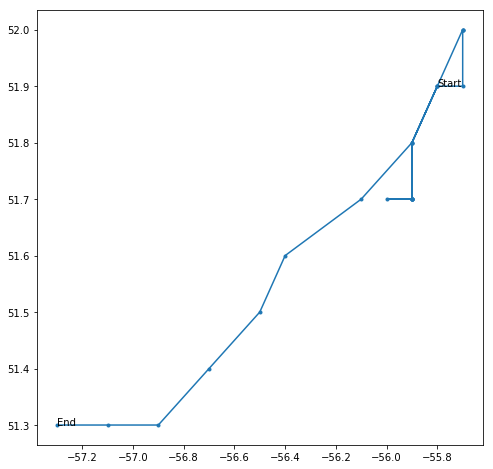

In [23]:
plt.figure(figsize=(8, 8))
plt.plot(df['Longitude'], df['Latitude'], '.-')
plt.annotate('Start', (df['Longitude'][0], df['Latitude'][0]))
plt.annotate('End', (df['Longitude'][len(df) - 1], df['Latitude'][len(df) - 1]))
plt.show()

In [24]:
df

,Date,Latitude,Longitude,Wind dir,Wind speed,Air temp,Water temp,dew point,pressure
0,2015-04-29 07:00:00,51.9,-55.8,20,23,0.8,-1.0,0.6,1010.8
1,2015-04-29 08:00:00,51.8,-55.9,20,22,0.9,-1.0,0.7,1010.5
2,2015-04-29 09:00:00,51.7,-55.9,30,25,0.9,-1.0,0.7,1009.8
3,2015-04-29 10:00:00,51.7,-55.9,30,24,0.9,-1.0,0.7,1009.8
4,2015-04-29 11:00:00,51.7,-55.9,30,25,1.0,-1.0,0.9,1009.9
5,2015-04-29 12:00:00,51.7,-55.9,30,24,1.2,-1.0,1.1,1010.1
6,2015-04-29 13:00:00,51.7,-55.9,30,16,1.7,NaN,1.6,1010.5
7,2015-04-29 14:00:00,51.7,-55.9,30,16,2.9,-1.0,2.8,1011.8
8,2015-04-29 15:00:00,51.7,-56.0,30,26,1.1,-1.0,1.0,1010.5
9,2015-04-29 16:00:00,51.7,-55.9,50,6,1.9,NaN,1.7,1011.3


Wind direction is measured in degrees clockwise from True North


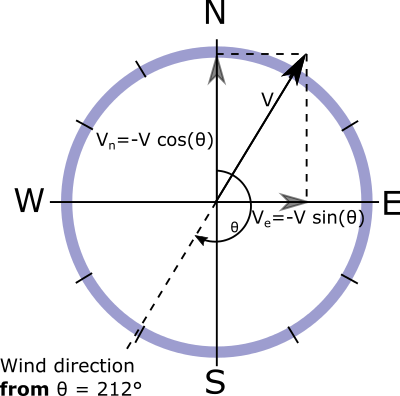

In [35]:
from IPython.display import Image
print('Wind direction is measured in degrees clockwise from True North')
Image(filename='/home/evankielley/Downloads/wind_direction.png') 

In [25]:
atm_data = metocean.NARRAtmosphere((np.datetime64(df['Date'][0]), np.datetime64(df['Date'][len(df)-1])))

In [26]:
def interpolate(reference_points, data_coords, *data_values):
    
    data_interpolator = metocean.Interpolate(data_coords, *data_values)
    
    interpolated_values = np.empty((len(reference_points), len(data_values)))
            
    for i, reference_point in enumerate(reference_points):

        grid_info = metocean.get_grid_info(data_coords)
        
        interpolated_values[i] = data_interpolator.interpolate(reference_point)
                                 
    return interpolated_values


def compare(reference_values, values):
    
    difference = reference_values - values
    
    return difference

In [27]:
atm_reference_coords = list(zip(list(df['Date'].values), \
                                list(df['Latitude'].values), \
                                list(df['Longitude'].values)))

atm_data_coords = atm_data.dataset.time.values, atm_data.dataset.latitude.values, atm_data.dataset.longitude.values

atm_data_values = atm_data.eastward_wind_velocities.values, atm_data.northward_wind_velocities.values

atm_values = interpolate(atm_reference_coords, atm_data_coords, *atm_data_values)
atm_reference_values = np.array([-df['Wind speed'].values * np.cos(df['Wind dir'].values), 
                            -df['Wind speed'].values * np.sin(df['Wind dir'].values)]).T

atm_value_differences = compare(atm_reference_values, atm_values)

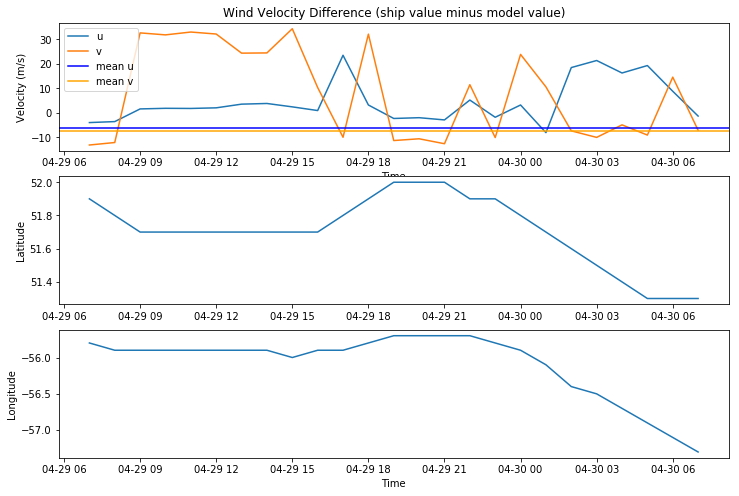

In [28]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df['Date'], atm_value_differences[:, 0], label='u')
plt.plot(df['Date'], atm_value_differences[:, 1], label='v')
plt.axhline(np.mean(atm_values[:, 0]), label='mean u', color='blue')
plt.axhline(np.mean(atm_values[:, 1]), label='mean v', color='orange')
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.title('Wind Velocity Difference (ship value minus model value)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df['Date'], df['Latitude'])
plt.ylabel('Latitude')

plt.subplot(3, 1, 3)
plt.plot(df['Date'], df['Longitude'])
plt.ylabel('Longitude')

plt.xlabel('Time')
plt.show()

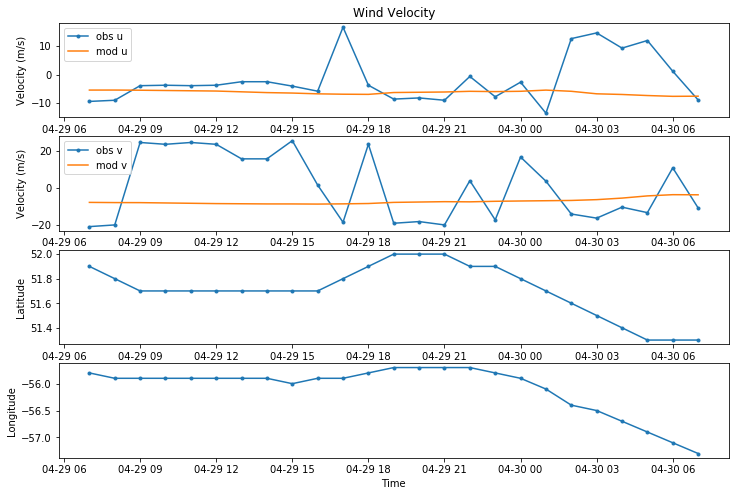

In [31]:
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['Date'], atm_reference_values[:, 0], '.-', label='obs u')
plt.plot(df['Date'], atm_values[:, 0], label='mod u')
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.title('Wind Velocity')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(df['Date'], atm_reference_values[:, 1], '.-', label='obs v')
plt.plot(df['Date'], atm_values[:, 1], label='mod v')
plt.xlabel('Time')
plt.ylabel('Velocity (m/s)')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(df['Date'], df['Latitude'], '.-')
plt.ylabel('Latitude')

plt.subplot(4, 1, 4)
plt.plot(df['Date'], df['Longitude'], '.-')
plt.ylabel('Longitude')

plt.xlabel('Time')
plt.show()

# ADCP

In [32]:
file_loc, message = urlretrieve('http://icedef.munroelab.ca/data/StatoilArcticNet/Leg1_1501_ADCP/an1501_os150bb.nc')

In [33]:
ds = xr.open_dataset(file_loc)

In [34]:
ds.keys

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:     (depth_cell: 45, time: 4544)
Coordinates:
  * time        (time) datetime64[ns] 2015-04-17T12:32:17 ...
Dimensions without coordinates: depth_cell
Data variables:
    trajectory  int32 ...
    vship       (time) float32 ...
    v           (time, depth_cell) float32 ...
    uship       (time) float32 ...
    u           (time, depth_cell) float32 ...
    tr_temp     (time) float32 ...
    pg          (time, depth_cell) float32 ...
    pflag       (time, depth_cell) float32 ...
    lon         (time) float64 ...
    lat         (time) float64 ...
    heading     (time) float32 ...
    depth       (time, depth_cell) float32 ...
    amp         (time, depth_cell) float32 ...
Attributes:
    featureType:  trajectoryProfile
    description:  Shipboard ADCP velocity profiles from an1501 using instrume...
    title:        Shipboard ADCP velocity profiles
    cruise_id:    an1501
    Conventions:  COARDS
    sonar:        os150bb


In [51]:
ds.uship

<xarray.DataArray 'uship' (time: 4544)>
array([    nan,     nan, 4.86249, ...,     nan,     nan,     nan],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2015-04-17T12:32:17 2015-04-17T12:37:18 ...
Attributes:
    data_max:   9.231773
    long_name:  Ship zonal velocity component
    C_format:   %9.4f
    data_min:   -8.214726
    units:      meter second-1

In [52]:
ds.u

<xarray.DataArray 'u' (time: 4544, depth_cell: 45)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2015-04-17T12:32:17 2015-04-17T12:37:18 ...
Dimensions without coordinates: depth_cell
Attributes:
    data_max:   0.7226237
    long_name:  Zonal velocity component
    C_format:   %7.2f
    data_min:   -1.3858433
    units:      meter second-1

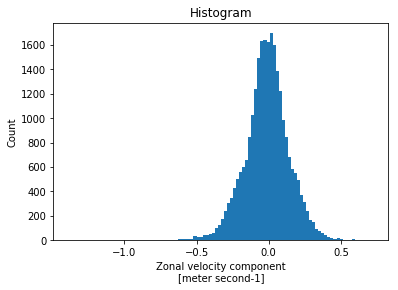

In [56]:
ds.u.plot.hist(bins=100)
plt.show()

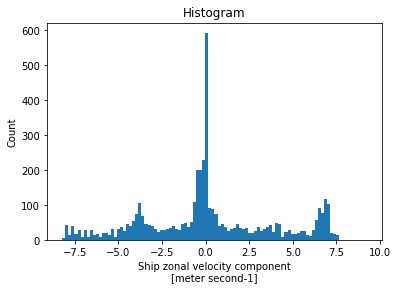

In [57]:
ds.uship.plot.hist(bins=100)
plt.show()

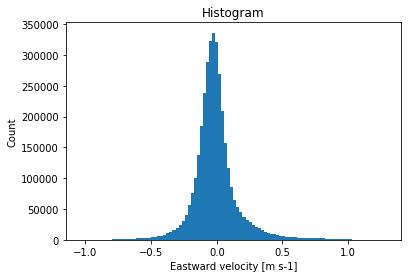

In [59]:
ocean_data.eastward_velocities.plot.hist(bins=100)
plt.show()

In [48]:
ds.attrs['description']

'Shipboard ADCP velocity profiles from an1501 using instrument os150bb'

In [37]:
ds.depth[0, :]

<xarray.DataArray 'depth' (depth_cell: 45)>
array([ 23.19,  31.19,  39.19,  47.19,  55.19,  63.19,  71.19,  79.19,  87.19,
        95.19, 103.19, 111.19, 119.19, 127.19, 135.19, 143.19, 151.19, 159.19,
       167.19, 175.19, 183.19, 191.19, 199.19, 207.19, 215.19, 223.19, 231.19,
       239.19, 247.19, 255.19, 263.19, 271.19, 279.19, 287.19, 295.19,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2015-04-17T12:32:17
Dimensions without coordinates: depth_cell
Attributes:
    C_format:   %8.2f
    positive:   down
    long_name:  Depth
    data_min:   23.17
    units:      meter
    data_max:   375.37

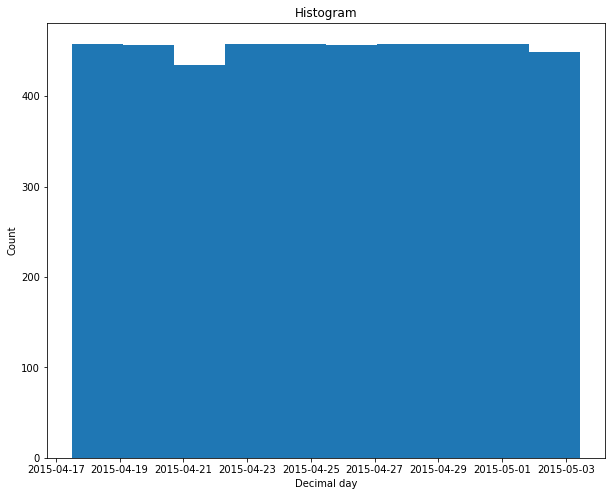

In [46]:
plt.figure(figsize=(10, 8))
ds.time.plot.hist()
plt.show()

/home/evankielley/.conda/envs/icedef/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: calling len() on an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Call len() on the Dataset.variables property instead, like ``len(ds.variables)``, to preserve existing behavior in a forwards compatible manner.
  after removing the cwd from sys.path.


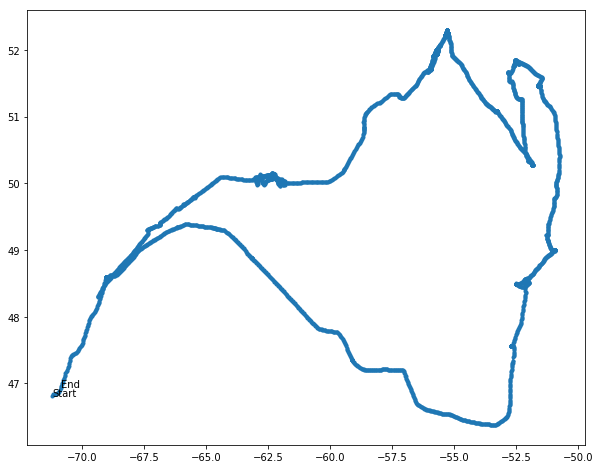

In [40]:
plt.figure(figsize=(10, 8))
plt.plot(ds.lon.values, ds.lat.values, '.-')
plt.annotate('Start', (ds.lon.values[0], ds.lat.values[0]))
plt.annotate('End', (ds.lon.values[len(ds) - 1], ds.lat.values[len(ds) - 1]))
plt.show()

In [41]:
ref_lats, ref_lons

(<xarray.DataArray (time: 17)>
 array([51.38151, 51.37668, 51.37202, 51.36684, 51.36183, 51.35783, 51.35515,
        51.35388, 51.35136, 51.35102, 51.3505 , 51.34941, 51.34834, 51.34583,
        51.34253, 51.33764, 51.33247])
 Coordinates:
   * time     (time) datetime64[ns] 2015-05-06T15:27:39 2015-05-06T16:27:22 ...,
 <xarray.DataArray (time: 17)>
 array([-53.21323, -53.2076 , -53.20559, -53.20383, -53.20299, -53.20664,
        -53.21014, -53.21395, -53.21604, -53.21788, -53.21687, -53.21303,
        -53.20917, -53.20428, -53.19964, -53.19717, -53.19627])
 Coordinates:
   * time     (time) datetime64[ns] 2015-05-06T15:27:39 2015-05-06T16:27:22 ...)

In [42]:
ocean_data = metocean.ECMWFOcean((df['Date'][0], df['Date'][len(df)-1]))

In [43]:
depth = 0
arr1 = np.where((ds.u.values[:, depth] > -10) & (ds.u.values[:, depth] < 10))[0]
arr2 = np.where((ds.v.values[:, depth] > -10) & (ds.v.values[:, depth] < 10))[0]
good_indices = np.union1d(arr1, arr2)

ocean_times = np.array([ds.time.values[i] for i in good_indices])
ocean_lats = np.array([ds.lat.values[i] for i in good_indices])
ocean_lons = np.array([ds.lon.values[i] for i in good_indices])
ocean_us = np.array([ds.u.values[i, depth] for i in good_indices])
ocean_vs = np.array([ds.v.values[i, depth] for i in good_indices])

ocean_i, ocean_j = np.where(ocean_times < np.datetime64(df['Date'][0]))[0][-1], \
                   np.where(ocean_times > np.datetime64(df['Date'][len(df)-1]))[0][0]

ocean_reference_coords = list(zip(list(ocean_times[ocean_i : ocean_j]), \
                                  list(ocean_lats[ocean_i : ocean_j]), \
                                  list(ocean_lons[ocean_i : ocean_j])))

ocean_data_coords = ocean_data.dataset.time.values, \
                    ocean_data.dataset.latitude.values, \
                    ocean_data.dataset.longitude.values

ocean_data_values = ocean_data.eastward_velocities.values, \
                    ocean_data.northward_current_velocities.values

ocean_values = interpolate(ocean_reference_coords, ocean_data_coords, *ocean_data_values)

ocean_reference_values = np.array((ocean_us[ocean_i : ocean_j], ocean_vs[ocean_i : ocean_j])).T
                            

ocean_value_differences = compare(ocean_reference_values, ocean_values)

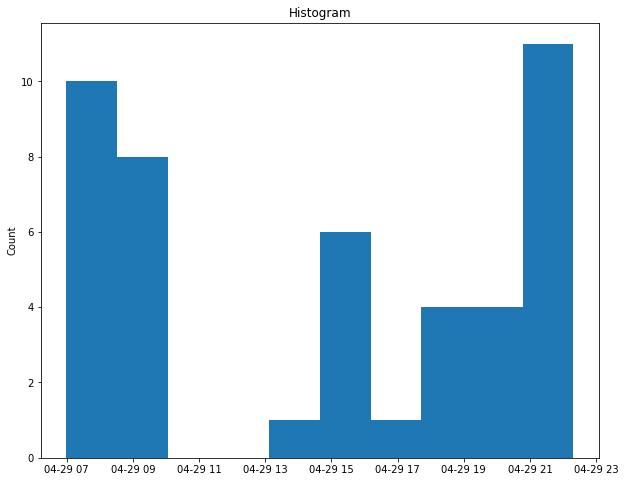

In [44]:
plt.figure(figsize=(10, 8))
xr.DataArray(ocean_times[ocean_i : ocean_j]).plot.hist()
plt.show()

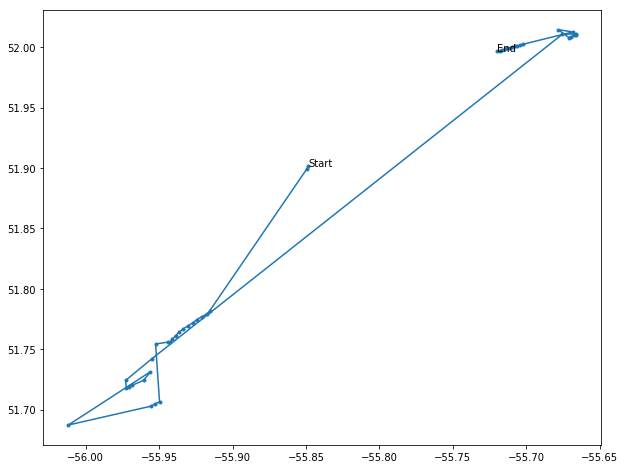

In [45]:
plt.figure(figsize=(10, 8))
plt.plot(ocean_lons[ocean_i : ocean_j], ocean_lats[ocean_i : ocean_j], '.-')
plt.annotate('Start', (ocean_lons[ocean_i : ocean_j][0], ocean_lats[ocean_i : ocean_j][0]))
plt.annotate('End', (ocean_lons[ocean_i : ocean_j][-1], ocean_lats[ocean_i : ocean_j][-1]))
plt.show()

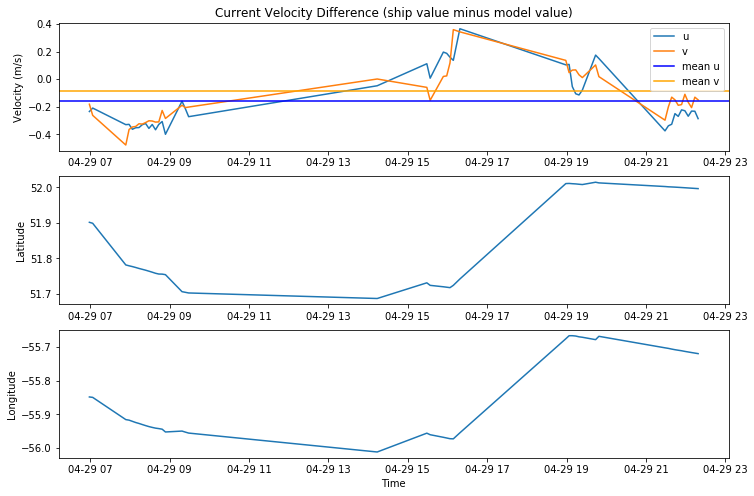

In [46]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(ocean_times[ocean_i : ocean_j], ocean_value_differences[:, 0], label='u')
plt.plot(ocean_times[ocean_i : ocean_j], ocean_value_differences[:, 1], label='v')
plt.axhline(np.mean(ocean_values[:, 0]), label='mean u', color='blue')
plt.axhline(np.mean(ocean_values[:, 1]), label='mean v', color='orange')
plt.ylabel('Velocity (m/s)')
plt.title('Current Velocity Difference (ship value minus model value)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(ocean_times[ocean_i : ocean_j], ocean_lats[ocean_i : ocean_j])
plt.ylabel('Latitude')

plt.subplot(3, 1, 3)
plt.plot(ocean_times[ocean_i : ocean_j], ocean_lons[ocean_i : ocean_j])
plt.ylabel('Longitude')

plt.xlabel('Time')
plt.show()

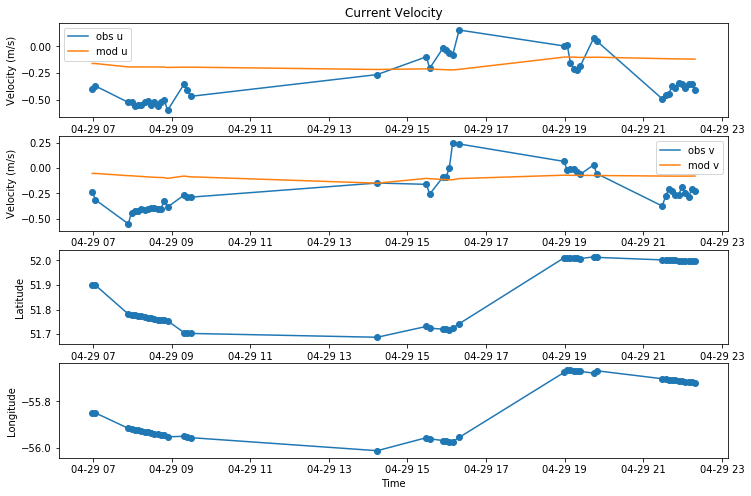

In [47]:
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(ocean_times[ocean_i : ocean_j], ocean_reference_values[:, 0], label='obs u')
plt.plot(ocean_times[ocean_i : ocean_j], ocean_values[:, 0], label='mod u')
plt.scatter(ocean_times[ocean_i : ocean_j], ocean_reference_values[:, 0])
plt.ylabel('Velocity (m/s)')
plt.title('Current Velocity')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(ocean_times[ocean_i : ocean_j], ocean_reference_values[:, 1], label='obs v')
plt.plot(ocean_times[ocean_i : ocean_j], ocean_values[:, 1], label='mod v')
plt.scatter(ocean_times[ocean_i : ocean_j], ocean_reference_values[:, 1])
plt.ylabel('Velocity (m/s)')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(ocean_times[ocean_i : ocean_j], ocean_lats[ocean_i : ocean_j])
plt.scatter(ocean_times[ocean_i : ocean_j], ocean_lats[ocean_i : ocean_j])
plt.ylabel('Latitude')

plt.subplot(4, 1, 4)
plt.plot(ocean_times[ocean_i : ocean_j], ocean_lons[ocean_i : ocean_j])
plt.scatter(ocean_times[ocean_i : ocean_j], ocean_lons[ocean_i : ocean_j])
plt.ylabel('Longitude')

plt.xlabel('Time')
plt.show()

# Difference Between Timesteppers

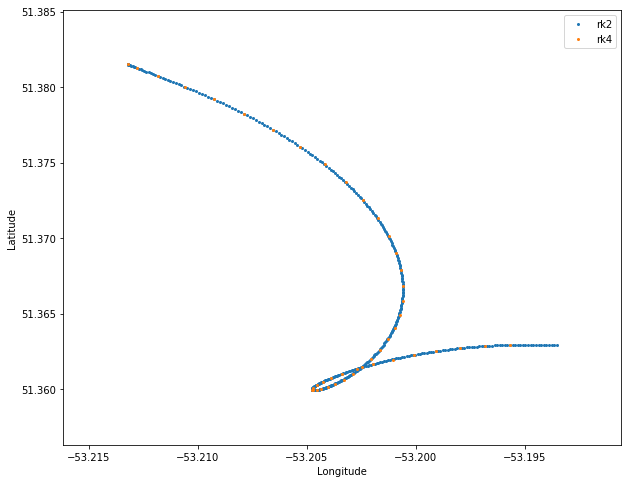

In [65]:
euler = 0
rk2 = 1
rk4 = 1
ab2 = 0
ab3 = 0

sim = simulator.Simulator()
sim.time_step = np.timedelta64(1200, 's')

plt.figure(figsize=(10, 8))

if euler:
    sim.time_stepper = timesteppers.euler
    sim.run_simulation(start_location, time_frame, time_step=time_step, store_results_as='euler')
    plt.scatter(sim.results['euler']['longitude'], sim.results['euler']['latitude'], s=4, label='euler')
    
if rk2:
    sim.time_step = np.timedelta64(120, 's')
    sim.time_stepper = timesteppers.rk2
    sim.run_simulation(start_location, time_frame, store_results_as='rk2')
    plt.scatter(sim.results['rk2']['longitude'], sim.results['rk2']['latitude'], s=4, label='rk2')

if rk4:
    sim.time_step = np.timedelta64(1200, 's')
    sim.time_stepper = timesteppers.rk4
    sim.run_simulation(start_location, time_frame, store_results_as='rk4')
    plt.scatter(sim.results['rk4']['longitude'], sim.results['rk4']['latitude'], s=4, label='rk4')

if ab2:
    sim.time_stepper = timesteppers.ab2
    sim.run_simulation(start_location, time_frame, store_results_as='ab2')
    plt.scatter(sim.results['ab2']['longitude'], sim.results['ab2']['latitude'], s=4, label='ab2')

if ab3:
    sim.time_stepper = timesteppers.ab3
    sim.run_simulation(start_location, time_frame, store_results_as='ab3')
    plt.scatter(sim.results['ab3']['longitude'], sim.results['ab3']['latitude'], s=4, label='ab3')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()